# 세팅

In [107]:
import pandas as pd
df = pd.read_csv('tumblbug_final.csv',index_col=0)

In [112]:
#필요 컬럼 추출 
df_hobby = df[df['category'].isin(['실용 · 취미'])]
df_app = df[df['category'].isin(['앱 · 웹 서비스'])]


df_hobby_url = df_hobby['url']
df_app_url = df_app['url']

# 크롤링

## 잡지

In [76]:
import re
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from tqdm import tqdm  

# Firefox 드라이버 로드
driver = webdriver.Firefox()

rewards_dict = {}

for url in tqdm(df_need):
    driver.get(url)
    driver.execute_script("window.scrollBy(0, 1000);")
    time.sleep(1.5) 

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # 선물 금액 크롤링
    reward_levels_elements = soup.find_all(class_="RewardSelector__RewardMinimumPledgeAmount-sc-10bnmkm-1 iUCmew")
    page_values = [element.text for element in reward_levels_elements if element.text != "1,000원 +"]

    # 선물 선택수 크롤링
    selection_counts_elements = soup.find_all(class_="RewardHeader__PledgeAmount-vcoad9-2 klGDse")
    page_counts = []
    for element in selection_counts_elements:
        numbers = re.findall(r'\d+', element.text)
        if numbers:  
            page_counts.append(int(numbers[0]))
        else:  
            page_counts.append(0)

    page_counts = [page_counts[i] for i in range(len(page_counts)) if i % 2 == 0]

    # 딕셔너리 업데이트
    for i in range(len(page_values)):
        if page_values[i] in rewards_dict:
            rewards_dict[page_values[i]] += page_counts[i]
        else:
            rewards_dict[page_values[i]] = page_counts[i]

driver.quit()


100%|██████████| 637/637 [30:32<00:00,  2.88s/it]  


In [77]:
df = pd.DataFrame(list(rewards_dict.items()), columns=['Reward Levels', 'Selection Counts'])

print(df)

    Reward Levels  Selection Counts
0       27,500원 +               804
1       33,500원 +               183
2       37,500원 +                85
3       49,500원 +               117
4       25,500원 +                50
..            ...               ...
335     49,800원 +                12
336    600,000원 +                 0
337  1,500,000원 +                 0
338      3,500원 +                 6
339     71,000원 +                 2

[340 rows x 2 columns]


## 앱 · 웹 서비스 크롤링

In [120]:
import re
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from tqdm import tqdm  

# Firefox 드라이버 로드
driver = webdriver.Firefox()

app_rewards_dict = {}

for url in tqdm(df_app_url):
    driver.get(url)
    driver.execute_script("window.scrollBy(0, 1000);")
    time.sleep(2.5) 

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # 선물 금액 크롤링
    reward_levels_elements = soup.find_all(class_="RewardSelector__RewardMinimumPledgeAmount-sc-10bnmkm-1 iUCmew")
    page_values = [element.text for element in reward_levels_elements if element.text != "1,000원 +"]

    # 선물 선택수 크롤링
    selection_counts_elements = soup.find_all(class_="RewardHeader__PledgeAmount-vcoad9-2 klGDse")
    page_counts = []
    for element in selection_counts_elements:
        numbers = re.findall(r'\d+', element.text)
        if numbers:  
            page_counts.append(int(numbers[0]))
        else:  
            page_counts.append(0)

    page_counts = [page_counts[i] for i in range(len(page_counts)) if i % 2 == 0]

    # 딕셔너리 업데이트
    for i in range(len(page_values)):
        if page_values[i] in app_rewards_dict:
            app_rewards_dict[page_values[i]] += page_counts[i]
        else:
            app_rewards_dict[page_values[i]] = page_counts[i]

driver.quit()


100%|██████████| 44/44 [02:46<00:00,  3.79s/it]


In [121]:
df_app_results = pd.DataFrame(list(app_rewards_dict.items()), columns=['Reward Levels', 'Selection Counts'])

df_app_results.to_csv('df_app_results.csv')

## 실용 · 취미 크롤링

In [122]:
import re
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from tqdm import tqdm  

# Firefox 드라이버 로드
driver = webdriver.Firefox()

hobby_rewards_dict = {}

for url in tqdm(df_hobby_url):
    driver.get(url)
    driver.execute_script("window.scrollBy(0, 1000);")
    time.sleep(2.5) 

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # 선물 금액 크롤링
    reward_levels_elements = soup.find_all(class_="RewardSelector__RewardMinimumPledgeAmount-sc-10bnmkm-1 iUCmew")
    page_values = [element.text for element in reward_levels_elements if element.text != "1,000원 +"]

    # 선물 선택수 크롤링
    selection_counts_elements = soup.find_all(class_="RewardHeader__PledgeAmount-vcoad9-2 klGDse")
    page_counts = []
    for element in selection_counts_elements:
        numbers = re.findall(r'\d+', element.text)
        if numbers:  
            page_counts.append(int(numbers[0]))
        else:  
            page_counts.append(0)

    page_counts = [page_counts[i] for i in range(len(page_counts)) if i % 2 == 0]

    # 딕셔너리 업데이트
    for i in range(len(page_values)):
        if page_values[i] in hobby_rewards_dict:
            hobby_rewards_dict[page_values[i]] += page_counts[i]
        else:
            hobby_rewards_dict[page_values[i]] = page_counts[i]

driver.quit()


100%|██████████| 1130/1130 [1:10:39<00:00,  3.75s/it]


In [123]:
df_hobby_results = pd.DataFrame(list(hobby_rewards_dict.items()), columns=['Reward Levels', 'Selection Counts'])

df_hobby_results.to_csv('df_hobby_results.csv')

In [124]:
df_hobby_results.head()

,Reward Levels,Selection Counts
0,"44,000원 +",1393
1,"27,500원 +",2357
2,"37,260원 +",181
3,"47,070원 +",27
4,"49,500원 +",2377


## 시각화

## 잡지

In [147]:
df = pd.read_csv('df_magazine_results.csv',index_col=0)
df.head(1)

,Reward Levels,Selection Counts,Log Reward Levels
0,27500.0,804,10.221978


In [149]:
df_vis.head()

,Reward Levels,Selection Counts,Log Reward Levels
0,27500.0,804,10.221978
1,33500.0,183,10.419331
2,37500.0,85,10.532123
3,49500.0,117,10.809748
4,25500.0,50,10.146473


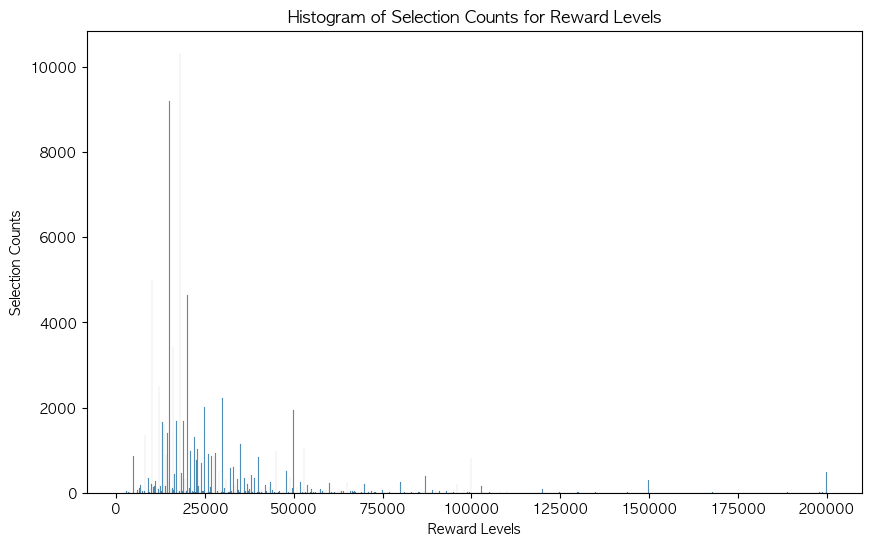

In [150]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df_vis, x='Reward Levels', weights='Selection Counts', bins=1000)
plt.title('Histogram of Selection Counts for Reward Levels')
plt.xlabel('Reward Levels')
plt.ylabel('Selection Counts')
plt.show()

범위를 좁힐 필요가 있어보인다.

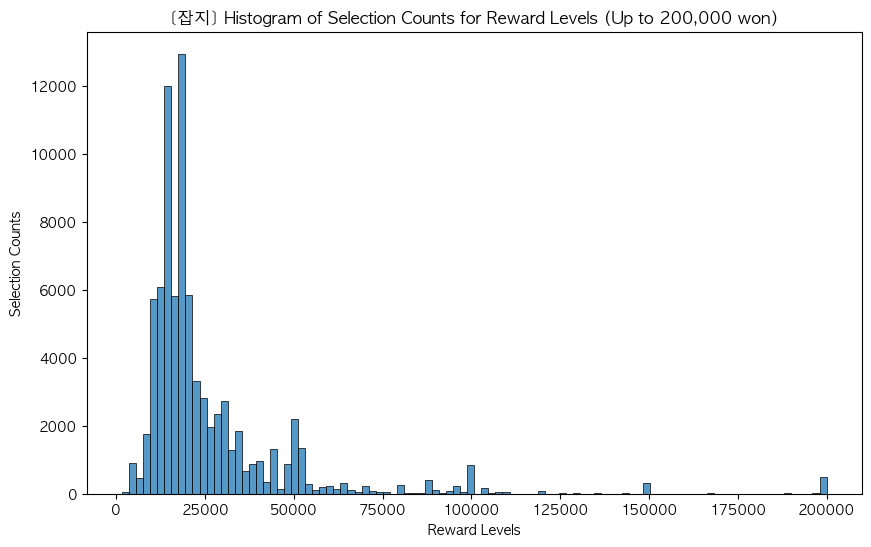

In [152]:
df_vis = df_vis[df_vis['Reward Levels'] <= 200000][['Reward Levels', 'Selection Counts']]

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data=df_vis, x='Reward Levels', weights='Selection Counts', bins=100)
plt.title('[잡지] Histogram of Selection Counts for Reward Levels (Up to 200,000 won)')
plt.xlabel('Reward Levels')
plt.ylabel('Selection Counts')
plt.show()

정규분포의 양상을 보이고 있다. 로그변환을 하면 그림이 어떨까?!

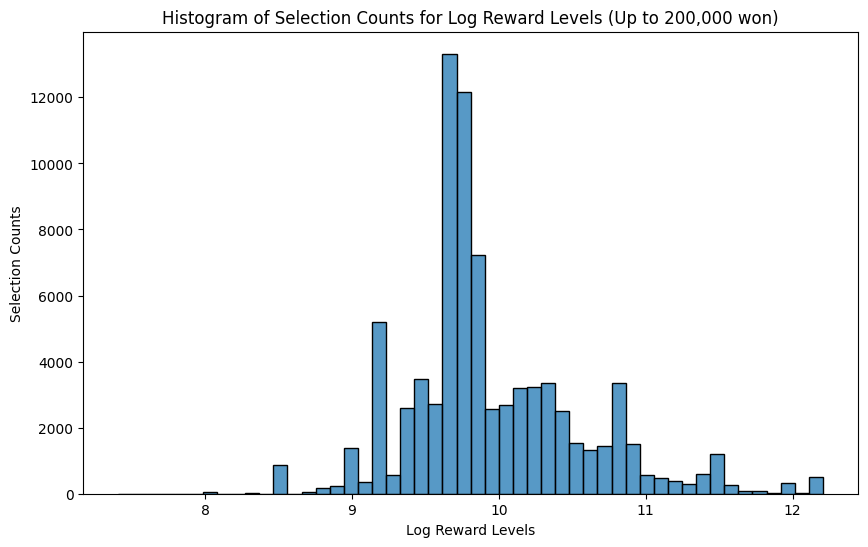

In [101]:
import numpy as np 

# 데이터 준비: 'Reward Levels'가 200,000 이하인 행만 추출
df_vis = df[df['Reward Levels'] <= 200000][['Reward Levels', 'Selection Counts']]

# 'Reward Levels'에 로그 변환 적용
df_vis['Log Reward Levels'] = np.log1p(df_vis['Reward Levels'])

# 로그 변환한 'Reward Levels'에 대한 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data=df_vis, x='Log Reward Levels', weights='Selection Counts', bins=50)
plt.title('Histogram of Selection Counts for Log Reward Levels (Up to 200,000 won)')
plt.xlabel('Log Reward Levels')
plt.ylabel('Selection Counts')
plt.show()

In [103]:
#50000원 아래로 했을때 전체의 몇퍼센트? 

num_under_50000 = df_vis[df_vis['Reward Levels'] <= 50000]['Selection Counts'].sum()

# 전체 구매자 수 계산
total_count = df_vis['Selection Counts'].sum()

# 비율 계산 및 출력
percentage = (num_under_50000 / total_count) * 100
print(f"50000원 이하로 구매한 사람들이 전체 구매자 중 {percentage:.2f}% 입니다.")


50000원 이하로 구매한 사람들이 전체 구매자 중 91.86% 입니다.


## 실용, 취미 

In [126]:
df_hobby_results.head()

,Reward Levels,Selection Counts
0,"44,000원 +",1393
1,"27,500원 +",2357
2,"37,260원 +",181
3,"47,070원 +",27
4,"49,500원 +",2377


In [127]:

#전처리
df_hobby_results_vis = df_hobby_results 
df_hobby_results_vis['Reward Levels'] = df_hobby_results['Reward Levels'].str.replace(',','')
df_hobby_results_vis['Reward Levels'] = df_hobby_results['Reward Levels'].str.replace('원', '')
df_hobby_results_vis['Reward Levels'] = df_hobby_results['Reward Levels'].str.replace('+', '').astype(float)

/var/folders/d1/k8w7ydl912db_c31zskh1q700000gn/T/ipykernel_4111/3237683484.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_hobby_results_vis['Reward Levels'] = df_hobby_results['Reward Levels'].str.replace('+', '').astype(float)


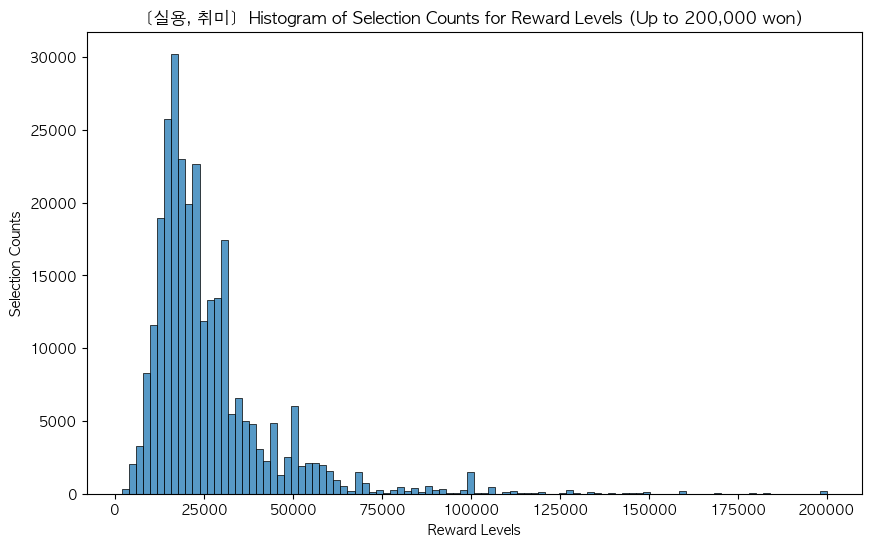

In [143]:
df_hobby_results_vis = df_hobby_results_vis[df_hobby_results_vis['Reward Levels'] <= 200000][['Reward Levels', 'Selection Counts']]

# 히스토그램 그리기
plt.rc('font', family='AppleGothic')
plt.figure(figsize=(10, 6))
sns.histplot(data=df_hobby_results_vis, x='Reward Levels', weights='Selection Counts', bins=100)
plt.title('[실용, 취미]  Histogram of Selection Counts for Reward Levels (Up to 200,000 won)')
plt.xlabel('Reward Levels')
plt.ylabel('Selection Counts')
plt.show()

## 앱 · 웹 서비스

In [135]:
df_app_results.head()

,Reward Levels,Selection Counts
0,"18,000원 +",66
1,"24,000원 +",364
2,"20,000원 +",126
3,"25,000원 +",698
4,"35,000원 +",80


In [136]:
#전처리
df_app_results_vis = df_app_results 
df_app_results_vis['Reward Levels'] = df_app_results['Reward Levels'].str.replace(',','')
df_app_results_vis['Reward Levels'] = df_app_results['Reward Levels'].str.replace('원', '')
df_app_results_vis['Reward Levels'] = df_app_results['Reward Levels'].str.replace('+', '').astype(float)

/var/folders/d1/k8w7ydl912db_c31zskh1q700000gn/T/ipykernel_4111/1181559295.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_app_results_vis['Reward Levels'] = df_app_results['Reward Levels'].str.replace('+', '').astype(float)


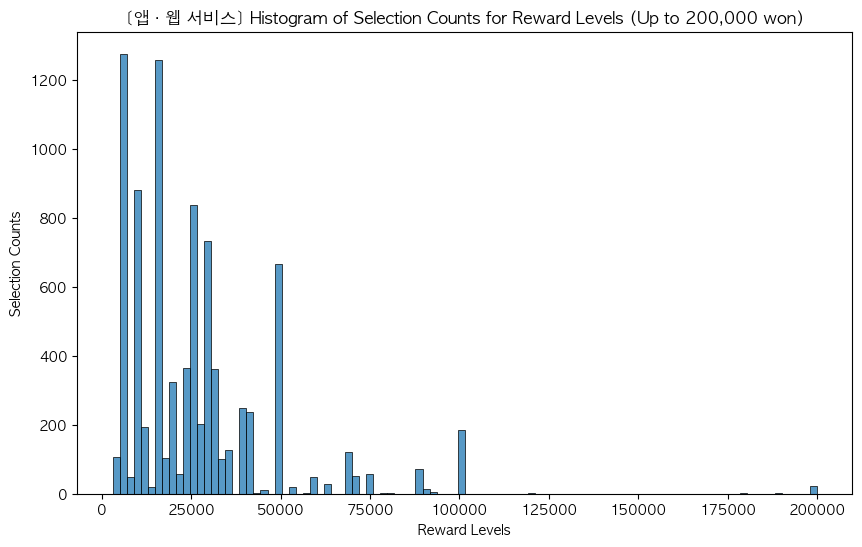

In [145]:
df_app_results_vis = df_app_results_vis[df_app_results_vis['Reward Levels'] <= 200000][['Reward Levels', 'Selection Counts']]

# 히스토그램 그리기
plt.rc('font', family='AppleGothic')
plt.figure(figsize=(10, 6))
sns.histplot(data=df_app_results_vis, x='Reward Levels', weights='Selection Counts', bins=100)
plt.title('[앱 · 웹 서비스] Histogram of Selection Counts for Reward Levels (Up to 200,000 won)')
plt.xlabel('Reward Levels')
plt.ylabel('Selection Counts')
plt.show()

In [153]:
#50000원 아래로 했을때 전체의 몇퍼센트? 

num_under_50000 = df_app_results_vis[df_app_results_vis['Reward Levels'] <= 50000]['Selection Counts'].sum()

# 전체 구매자 수 계산
total_count = df_app_results_vis['Selection Counts'].sum()

# 비율 계산 및 출력
percentage = (num_under_50000 / total_count) * 100
print(f"50000원 이하로 구매한 사람들이 전체 구매자 중 {percentage:.2f}% 입니다.")


50000원 이하로 구매한 사람들이 전체 구매자 중 92.75% 입니다.
